In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [25]:
df = pd.read_csv('분석용.xlsx - 시트1 (1).csv')

In [26]:
df.columns

Index(['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)', '학부는 어디인가요?', 'Unnamed: 2',
       '어느 도시에서 공부하고 있나요?', '나라 레이블', '당신의 도시나 나라에서 ChatGPT는 금지되었나요?',
       '대학에서 ChatGPT 사용이 금지되었나요?', 'ChatGPT 사용에 익숙하신가요?',
       '학문적 작업에 ChatGPT를 사용해본 적이 있나요?', '주당 공부 시간은 얼마나 되나요?',
       'ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?', '그 도구의 단점은 무엇인가요?',
       '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]',
  

## 현재 몇학년이신가요?': 막대 그래프 또는 파이 차트를 사용하여 학년별 응답 수를 시각화할 수 있습니다.

<Axes: >

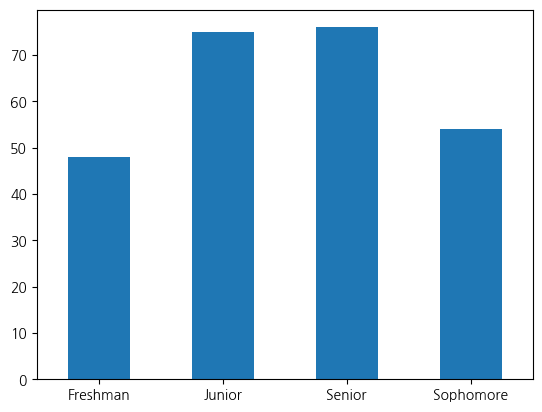

In [27]:
df['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)'].value_counts().sort_index().plot(kind='bar', rot=0)

## '학부는 어디인가요?': 가장 많이 선택된 학부 상위 5개를 수평 막대 그래프로 시각화하거나, 학부별 응답 수를 원 그래프로 나타낼 수 있습니다.


<Axes: >

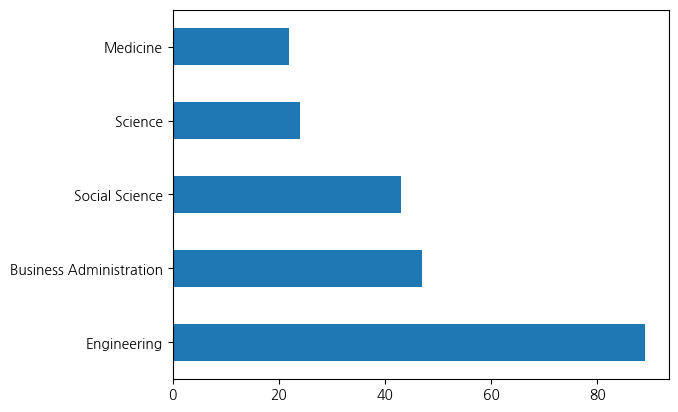

In [28]:
# '학부는 어디인가요?' 열을 기준으로 응답 수를 세기
value_counts = df['학부는 어디인가요?'].value_counts().nlargest(5)

# 수평 막대 그래프 그리기
value_counts.plot.barh()

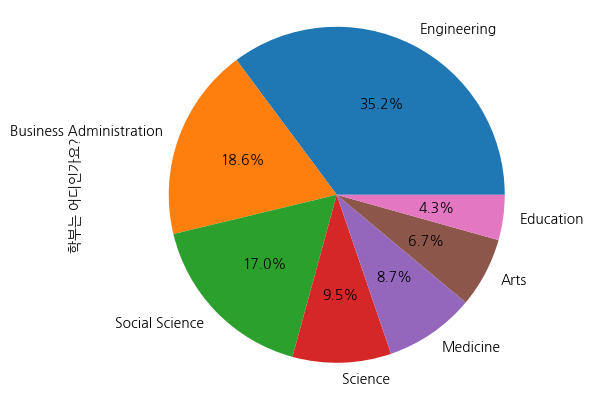

In [29]:
# '학부는 어디인가요?' 컬럼 시각화 (원 그래프)

df['학부는 어디인가요?'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.axis('equal')
plt.show()

## '나라 레이블': 막대 그래프나 파이 차트를 사용하여 각 나라의 응답 수를 시각화할 수 있습니다.


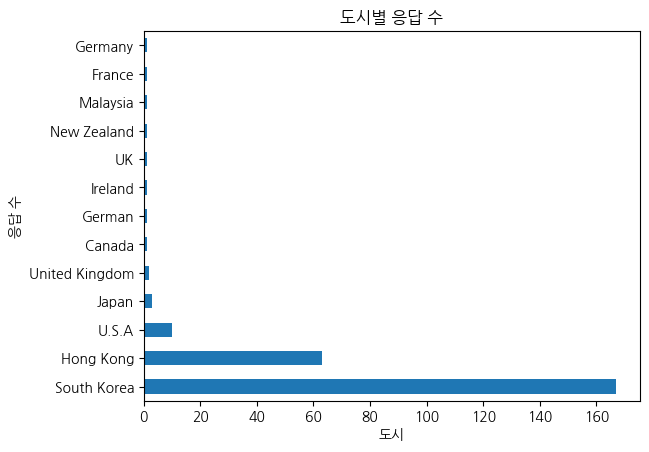

In [30]:
df['나라 레이블'].value_counts().plot(kind='barh')
plt.xlabel('도시')
plt.ylabel('응답 수')
plt.title('도시별 응답 수')
plt.show()

## '당신의 도시나 나라에서 ChatGPT는 금지되었나요?': 파이 차트를 사용하여 금지 여부에 따른 응답 수를 비교할 수 있습니다.


<Axes: >

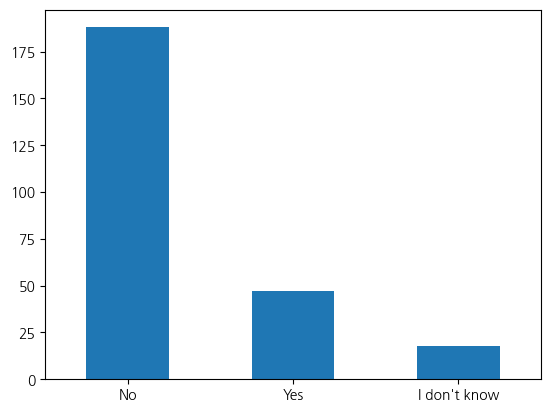

In [31]:
df['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts().plot(kind='bar', rot=0)

In [32]:
df.groupby('나라 레이블')['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts()

나라 레이블          당신의 도시나 나라에서 ChatGPT는 금지되었나요?
Canada          No                                 1
France          No                                 1
German          No                                 1
Germany         I don't know                       1
Hong Kong       Yes                               45
                No                                10
                I don't know                       8
Ireland         No                                 1
Japan           No                                 3
Malaysia        No                                 1
New Zealand     No                                 1
South Korea     No                               157
                I don't know                       8
                Yes                                2
U.S.A           No                                 9
                I don't know                       1
UK              No                                 1
United Kingdom  No                                 2


In [33]:
grouped_counts = df.groupby('나라 레이블')['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts()
filtered_counts = grouped_counts[grouped_counts > 1]
filtered_df = df[df['나라 레이블'].isin(filtered_counts.index.get_level_values(0))]


In [34]:
total_counts = filtered_counts.groupby('나라 레이블').sum()
ratios = filtered_counts / total_counts

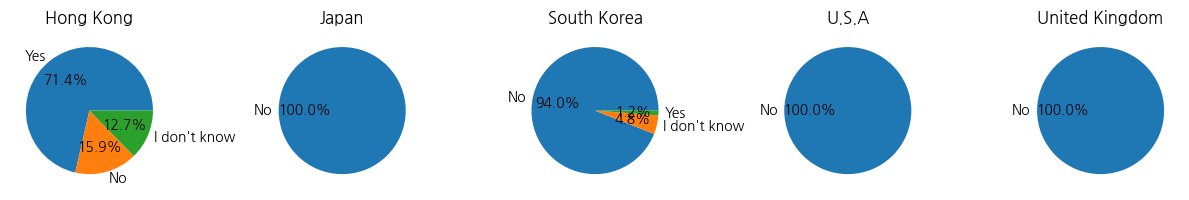

In [35]:
import matplotlib.pyplot as plt

# 나라별로 서브플롯 생성
countries = ratios.index.get_level_values(0).unique()
num_countries = len(countries)
fig, axes = plt.subplots(nrows=1, ncols=num_countries, figsize=(12, 4))

# 나라별 파이 차트 그리기
for i, country in enumerate(countries):
    country_ratios = ratios[country]
    ax = axes[i]
    ax.pie(country_ratios, labels=country_ratios.index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## '대학에서 ChatGPT 사용이 금지되었나요?': 파이 차트를 사용하여 사용 금지 여부에 따른 응답 수를 시각화할 수 있습니다.


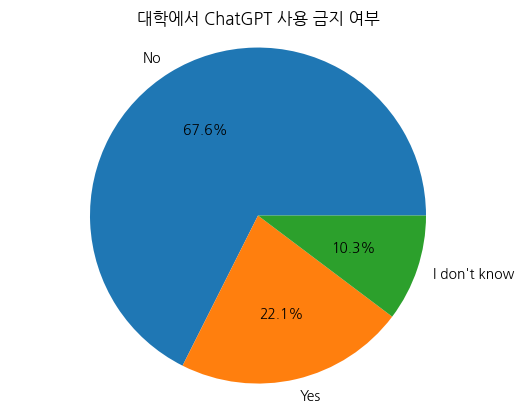

In [36]:
# '대학에서 ChatGPT 사용이 금지되었나요?' 열을 기준으로 응답 수를 세기
value_counts = df['대학에서 ChatGPT 사용이 금지되었나요?'].value_counts()

# 파이 차트 그리기
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('대학에서 ChatGPT 사용 금지 여부')
plt.axis('equal')  # 파이 차트를 원형으로 표현
plt.show()

## 'ChatGPT 사용에 익숙하신가요?': 막대 그래프를 사용하여 익숙함 수준을 표현할 수 있습니다.


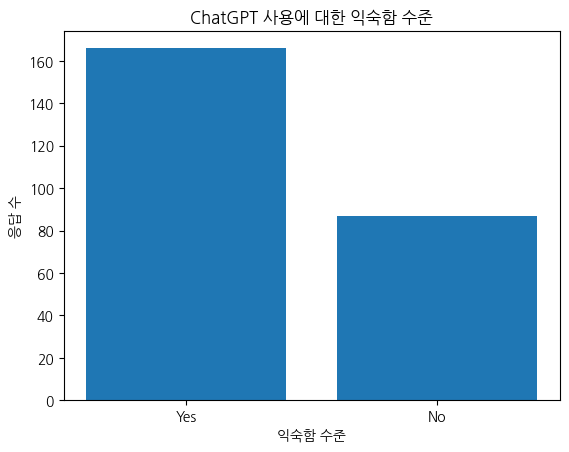

In [37]:
# 'ChatGPT 사용에 익숙하신가요?' 열을 기준으로 응답 수를 세기
value_counts = df['ChatGPT 사용에 익숙하신가요?'].value_counts()

# 막대 그래프 그리기
plt.bar(value_counts.index, value_counts)
plt.title('ChatGPT 사용에 대한 익숙함 수준')
plt.xlabel('익숙함 수준')
plt.ylabel('응답 수')
plt.show()

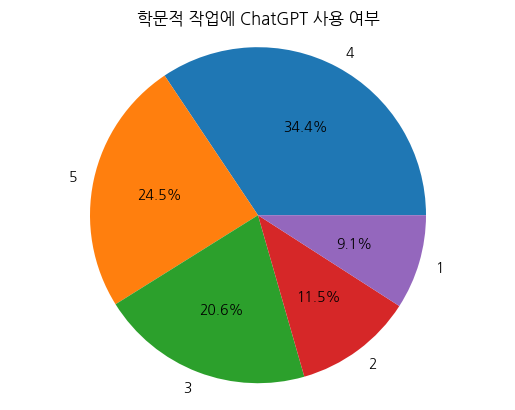

In [38]:
# '학문적 작업에 ChatGPT를 사용해본 적이 있나요?' 열을 기준으로 응답 수를 세기
value_counts = df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'].value_counts()

# 파이 차트 그리기
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('학문적 작업에 ChatGPT 사용 여부')
plt.axis('equal')  # 파이 차트를 원형으로 표현
plt.show()

대학에서 ChatGPT 사용이 금지되었나요?       I don't know   No  Yes
당신의 도시나 나라에서 ChatGPT는 금지되었나요?                        
I don't know                              8    6    4
No                                       16  159   13
Yes                                       2    6   39


<Axes: xlabel='대학에서 ChatGPT 사용이 금지되었나요?', ylabel='당신의 도시나 나라에서 ChatGPT는 금지되었나요?'>

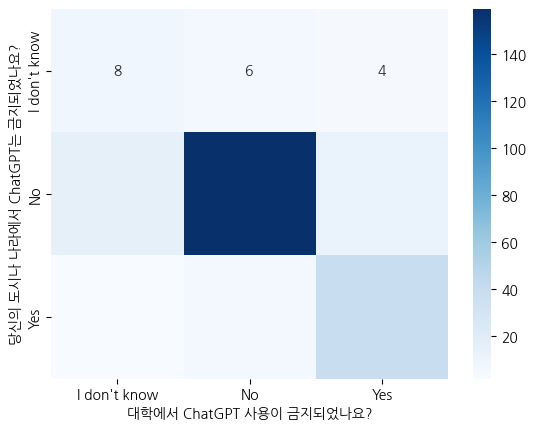

In [39]:
ban_agree_cross = pd.crosstab(df['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'], df['대학에서 ChatGPT 사용이 금지되었나요?'])
print(ban_agree_cross)

# 시각화
sns.heatmap(ban_agree_cross, annot=True, fmt='d', cmap='Blues')
# plt.title('ChatGPT 사용 금지 여부와 대학에서의 사용 금지 정책에 대한 동의 여부')
# plt.xlabel('대학에서 ChatGPT 사용 금지')
# plt.ylabel('도시나 나라에서 ChatGPT 금지')
# plt.show()

## 주당 공부시간

<Axes: >

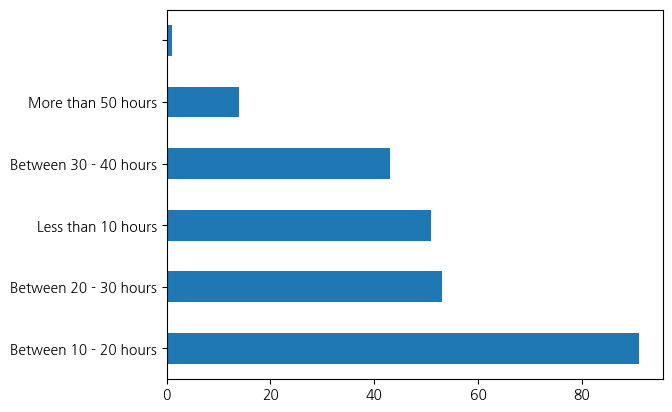

In [40]:
df['주당 공부 시간은 얼마나 되나요?'].value_counts().plot.barh()

<Axes: ylabel='학문적 작업에 ChatGPT를 사용해본 적이 있나요?,주당 공부 시간은 얼마나 되나요?'>

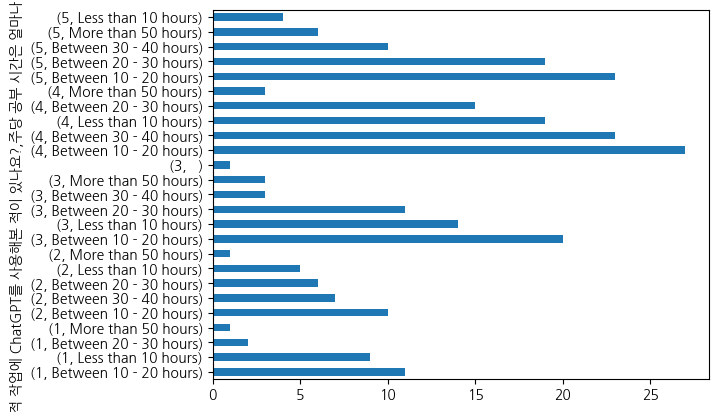

In [41]:
df.groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['주당 공부 시간은 얼마나 되나요?'].value_counts().plot.barh()

## 학습 도구로의 사용

<Axes: >

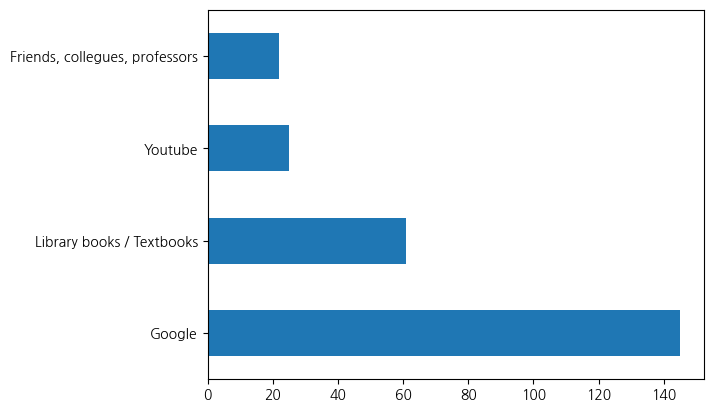

In [42]:
df['ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?'].value_counts().plot.barh()

In [43]:
df['그 도구의 단점은 무엇인가요?'].str.split(',')

0                                [Incorrect information]
1      [Time consuming,  Irrelevant information,  Too...
2        [Irrelevant information,  Too much information]
3                                [Incorrect information]
4                               [Irrelevant information]
                             ...                        
248              [Time consuming,  Too much information]
249              [Time consuming,  Too much information]
250              [Time consuming,  Too much information]
251              [Time consuming,  Too much information]
252    [Time consuming,  Irrelevant information,  Too...
Name: 그 도구의 단점은 무엇인가요?, Length: 253, dtype: object

In [44]:
words = []
for item in df['그 도구의 단점은 무엇인가요?']:
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

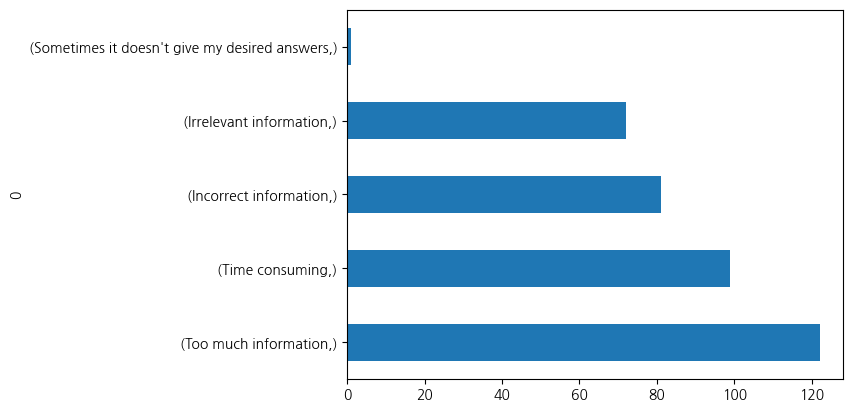

In [50]:
pd.DataFrame(words).value_counts().plot.barh()

In [51]:
# 워드 클라우드로 생성
df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?']

0                       To have conversations when bored
1                                       Content creation
2      Better organization of information than search...
3                              When coming up with ideas
4      Provides quick answers, can also provide guidance
                             ...                        
248                       Research and understand topics
249                                                  NaN
250                                              Nothing
251               I don't use ChatGPT for other purposes
252                                              I don't
Name: 공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?, Length: 253, dtype: object

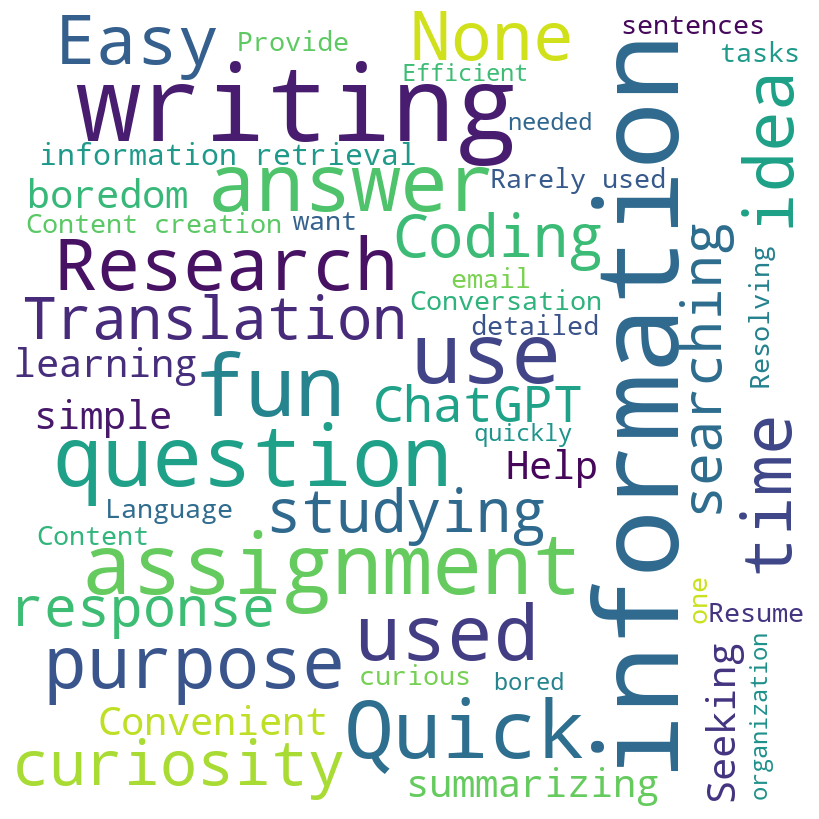

In [52]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터를 불러옵니다. 이 예제에서는 df라는 DataFrame이 이미 있습니다.
# df = pd.read_csv('your_file.csv')

# '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유' 컬럼의 텍스트를 모두 결합합니다.
text = ' '.join(df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?'].astype(str))

# 워드 클라우드를 생성합니다.
wordcloud = WordCloud(max_words=50, width=800, height=800, background_color='white').generate(text)

# 워드 클라우드를 시각화합니다.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [53]:
word_frequencies = wordcloud.words_

# Print the word frequencies.
for word, freq in word_frequencies.items():
    print(f'Word: {word}, Frequency: {freq}')


Word: information, Frequency: 1.0
Word: writing, Frequency: 0.8333333333333334
Word: fun, Frequency: 0.5
Word: use, Frequency: 0.5
Word: assignment, Frequency: 0.5
Word: question, Frequency: 0.5
Word: Quick, Frequency: 0.4583333333333333
Word: answer, Frequency: 0.4583333333333333
Word: used, Frequency: 0.4166666666666667
Word: Research, Frequency: 0.375
Word: purpose, Frequency: 0.375
Word: time, Frequency: 0.3333333333333333
Word: Easy, Frequency: 0.3333333333333333
Word: None, Frequency: 0.3333333333333333
Word: idea, Frequency: 0.3333333333333333
Word: curiosity, Frequency: 0.2916666666666667
Word: studying, Frequency: 0.2916666666666667
Word: Coding, Frequency: 0.2916666666666667
Word: Translation, Frequency: 0.2916666666666667
Word: searching, Frequency: 0.25
Word: response, Frequency: 0.25
Word: ChatGPT, Frequency: 0.20833333333333334
Word: summarizing, Frequency: 0.20833333333333334
Word: learning, Frequency: 0.20833333333333334
Word: Convenient, Frequency: 0.20833333333333334


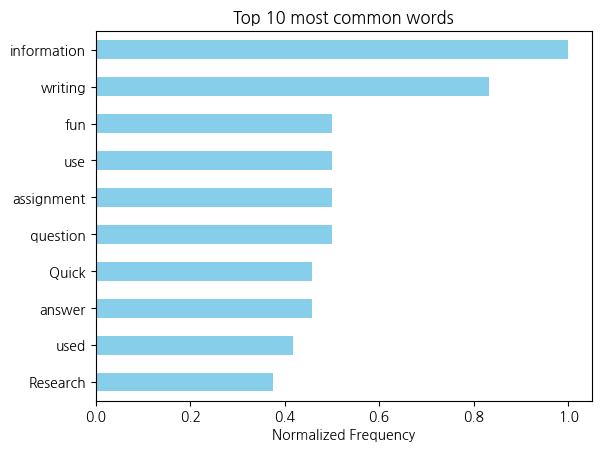

In [54]:
# Convert the dictionary to a DataFrame
df_word_freq = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values('Frequency', ascending=False)

# Select the top 10 words
df_top_10 = df_word_freq.head(10)

# Plot the bar graph of the top 10 words
df_top_10.plot(kind='barh', legend=False, color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency word at the top.
plt.xlabel('Normalized Frequency')
plt.title('Top 10 most common words')
plt.show()

## 장점

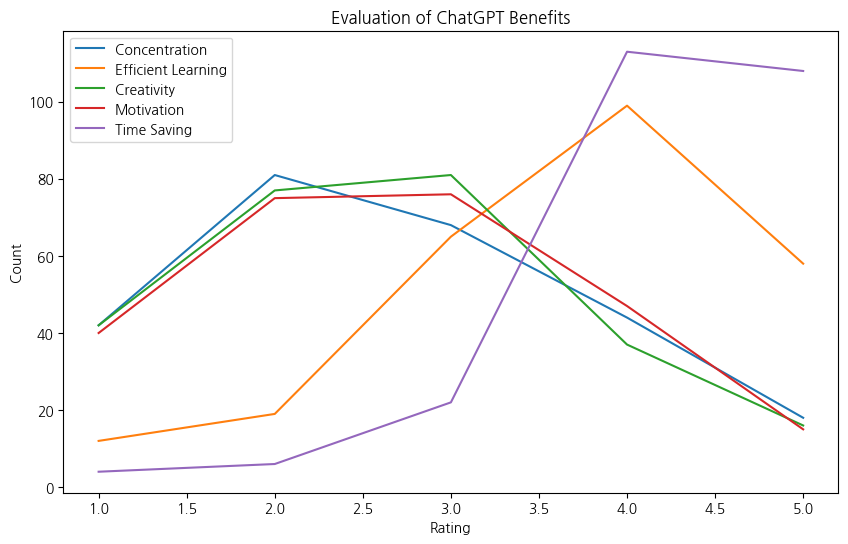

In [55]:
# 데이터 준비
concentration = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]'].value_counts().sort_index()
efficient_learning = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]'].value_counts().sort_index()
creativity = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]'].value_counts().sort_index()
motivation = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]'].value_counts().sort_index()
time_saving = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]'].value_counts().sort_index()
# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(concentration, label='Concentration')
plt.plot(efficient_learning, label='Efficient Learning')
plt.plot(creativity, label='Creativity')
plt.plot(motivation, label='Motivation')
plt.plot(time_saving, label='Time Saving')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Evaluation of ChatGPT Benefits')
plt.legend()
plt.show()


## 단점 

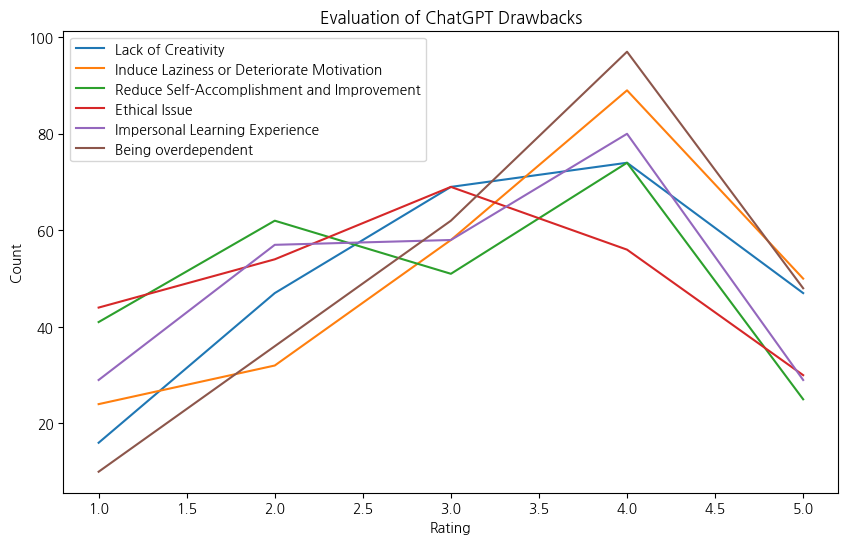

In [58]:
# 데이터 준비
lack_of_creativity = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]'].value_counts().sort_index()
induce_laziness = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]'].value_counts().sort_index()
reduce_self_improvement = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Reduce self-accomplishment and improvement]'].value_counts().sort_index()
ethical_issue = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Ethical issue]'].value_counts().sort_index()
impersonal_experience = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Impersonal learning experience]'].value_counts().sort_index()
overdependent = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(lack_of_creativity, label='Lack of Creativity')
plt.plot(induce_laziness, label='Induce Laziness or Deteriorate Motivation')
plt.plot(reduce_self_improvement, label='Reduce Self-Accomplishment and Improvement')
plt.plot(ethical_issue, label='Ethical Issue')
plt.plot(impersonal_experience, label='Impersonal Learning Experience')
plt.plot(overdependent, label='Being overdependent')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Evaluation of ChatGPT Drawbacks')
plt.legend()
plt.show()

## GPT 대학 교육 적합성

<Axes: >

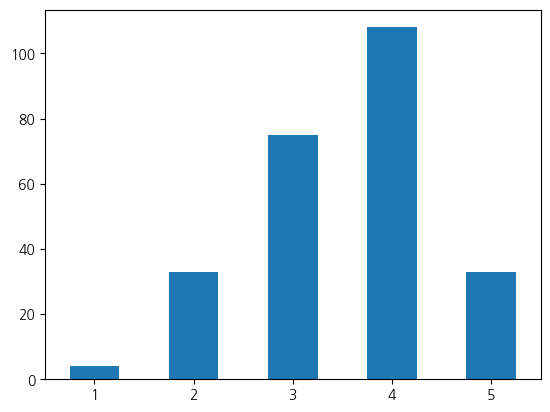

In [195]:
#  'ChatGPT는 학문적으로 적합하다', '대학에서 ChatGPT 사용이 금지된다면, 이 정책에 동의하시나요?',
df['ChatGPT는 학문적으로 적합하다'].value_counts().sort_index().plot.bar(rot=0)

<Axes: >

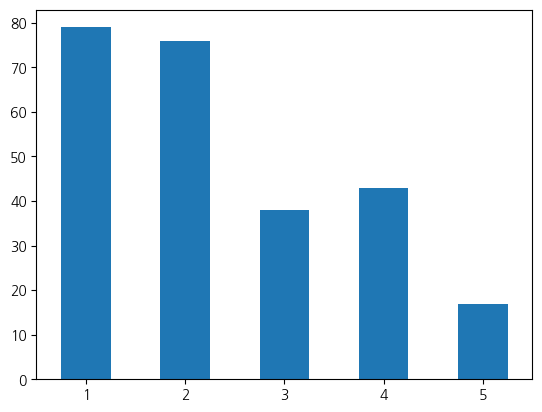

In [200]:
df['대학에서 ChatGPT 사용이 금지된다면, 이 정책에 동의하시나요?'].value_counts().sort_index().plot.bar(rot=0)

<Axes: >

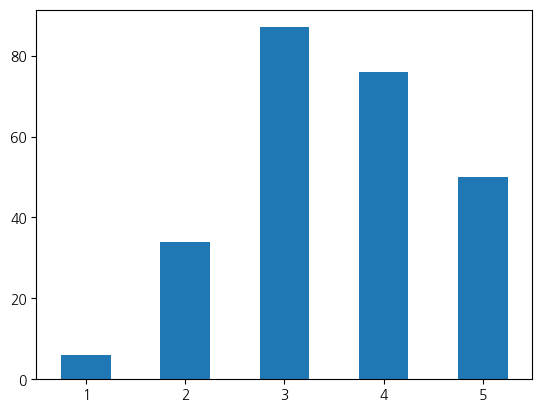

In [205]:
# '대학은 ChatGPT 사용을 장려해야 한다', '대학은 ChatGPT 사용법 교육을 제공해야 한다'
df['대학은 ChatGPT 사용을 장려해야 한다'].value_counts().sort_index().plot.bar(rot=0)

In [206]:
def plot_value_counts(df, column):
    """
    Create a bar plot for the value counts of the specified column in df.
    
    Parameters:
    df (pandas.DataFrame): The pandas DataFrame.
    column (str): The column name.
    """
    # 값의 빈도를 계산하고 인덱스로 정렬
    value_counts = df[column].value_counts().sort_index()
    
    # 바 차트 생성
    value_counts.plot.bar(rot=0)
    
    # 그래프에 제목과 레이블 추가
    plt.title(f'Value Counts of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    # 그래프 출력
    plt.show()

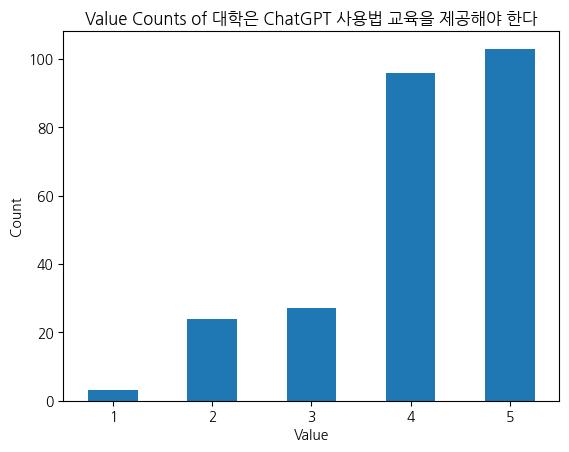

In [207]:
plot_value_counts(df, '대학은 ChatGPT 사용법 교육을 제공해야 한다' )

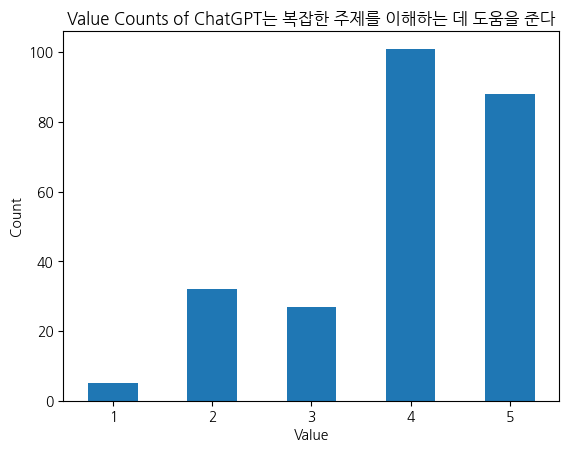

In [208]:
# 'ChatGPT는 복잡한 주제를 이해하는 데 도움을 준다', '공부할때 ChatGPT를 사용하는 것이 편안하다',
plot_value_counts(df, 'ChatGPT는 복잡한 주제를 이해하는 데 도움을 준다' )

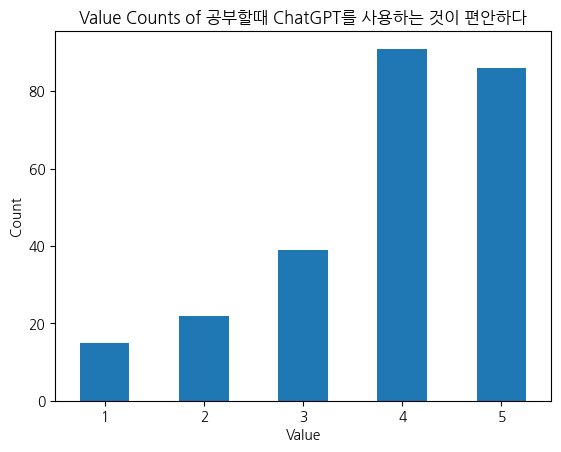

In [209]:
plot_value_counts(df, '공부할때 ChatGPT를 사용하는 것이 편안하다' )

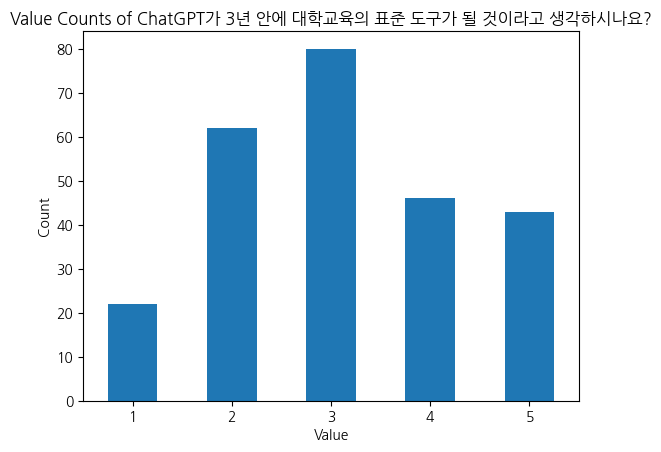

In [210]:
plot_value_counts(df,  'ChatGPT가 3년 안에 대학교육의 표준 도구가 될 것이라고 생각하시나요?' )

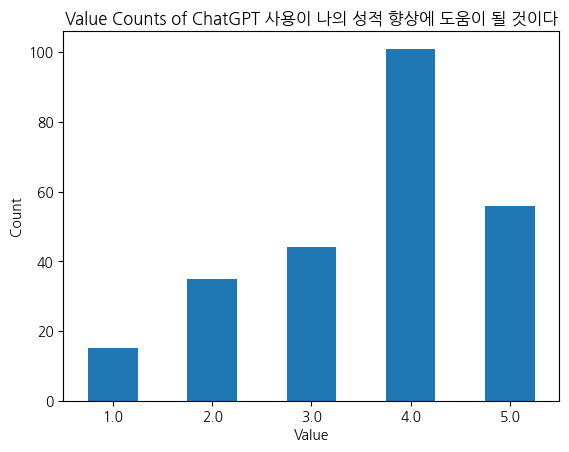

In [211]:
plot_value_counts(df,'ChatGPT 사용이 나의 성적 향상에 도움이 될 것이다' )

In [215]:
words = []
for item in df['ChatGPT를 어떤 목적으로 유용하게 사용하셨나요?']:
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

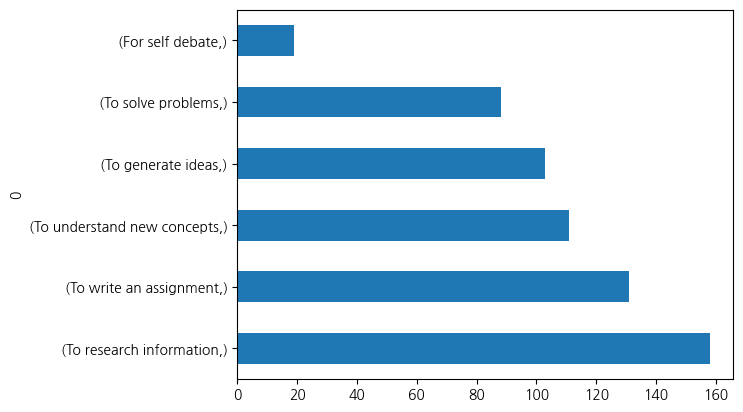

In [225]:
pd.DataFrame(words).value_counts()[:6].plot.barh()

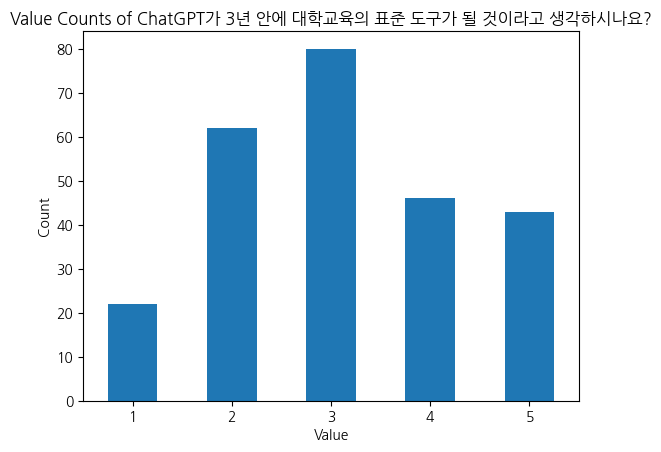

In [226]:
plot_value_counts(df,  'ChatGPT가 3년 안에 대학교육의 표준 도구가 될 것이라고 생각하시나요?' )

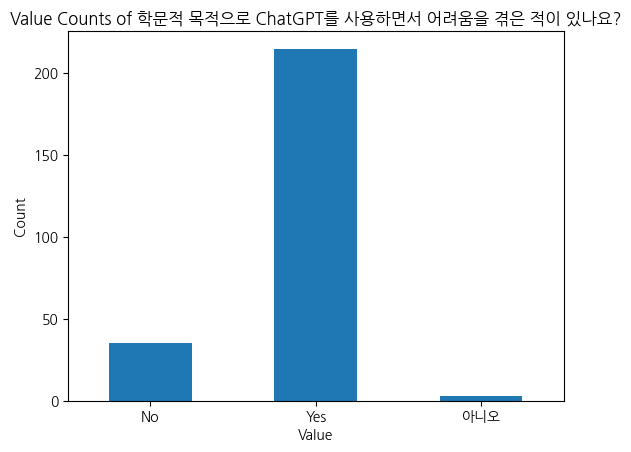

In [227]:
       , '있다면, 그 어려움은 무엇인가요?',
plot_value_counts(df,  '학문적 목적으로 ChatGPT를 사용하면서 어려움을 겪은 적이 있나요?' )

<Axes: >

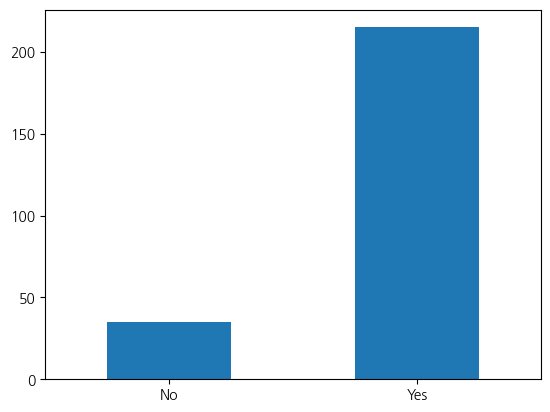

In [231]:
df['학문적 목적으로 ChatGPT를 사용하면서 어려움을 겪은 적이 있나요?'].value_counts().sort_index()[:2].plot.bar(rot=0)

In [237]:
words = []
for item in df['있다면, 그 어려움은 무엇인가요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

['Inaccurate of information',
 'Generating irrelevant content',
 'Inaccurate of information',
 'Inaccurate of information',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Format and structure',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 '2021년 이전 정보만 제공한다는 점에서 부정확하다고 생각함',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Format and structure',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Unreliable source',
 'Inaccurate of information',
 'Biased or subjective responses',
 'Unreliable source',
 'Inaccurate of information',
 'Generating irrelevant content',
 'Unreliable source',
 'Unreliable 

<Axes: ylabel='0'>

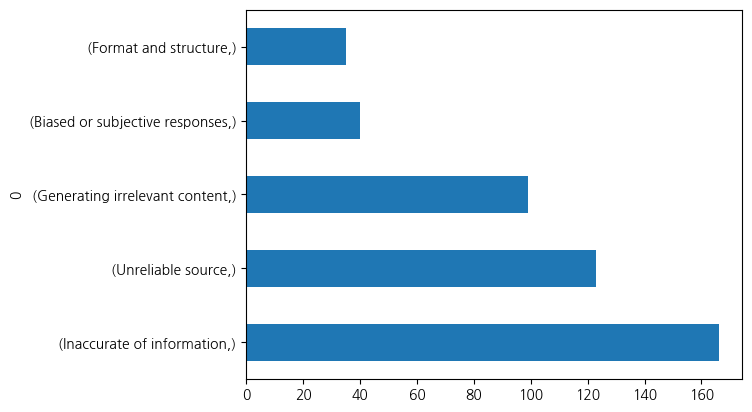

In [242]:
pd.DataFrame(words).value_counts()[:5].plot.barh()

In [236]:
df['있다면, 그 어려움은 무엇인가요?'].dropna()

0                              Inaccurate of information
1                          Generating irrelevant content
3                              Inaccurate of information
4                              Inaccurate of information
5      Inaccurate of information, Generating irreleva...
                             ...                        
248         Inaccurate of information, Unreliable source
249    Inaccurate of information, Generating irreleva...
250         Inaccurate of information, Unreliable source
251         Inaccurate of information, Unreliable source
252         Inaccurate of information, Unreliable source
Name: 있다면, 그 어려움은 무엇인가요?, Length: 231, dtype: object

In [244]:
words = []
for item in df['왜 ChatGPT를 사용하시나요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

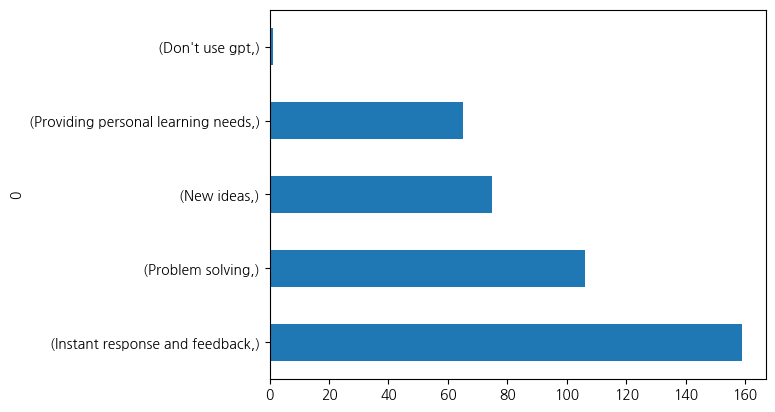

In [248]:
pd.DataFrame(words).value_counts()[:5].plot.barh()

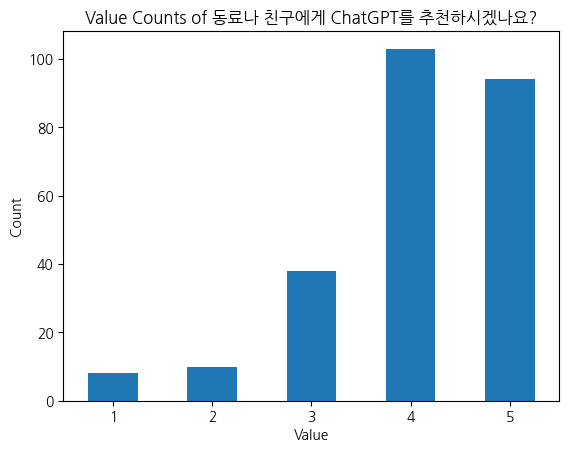

In [249]:
plot_value_counts(df,  '동료나 친구에게 ChatGPT를 추천하시겠나요?', )

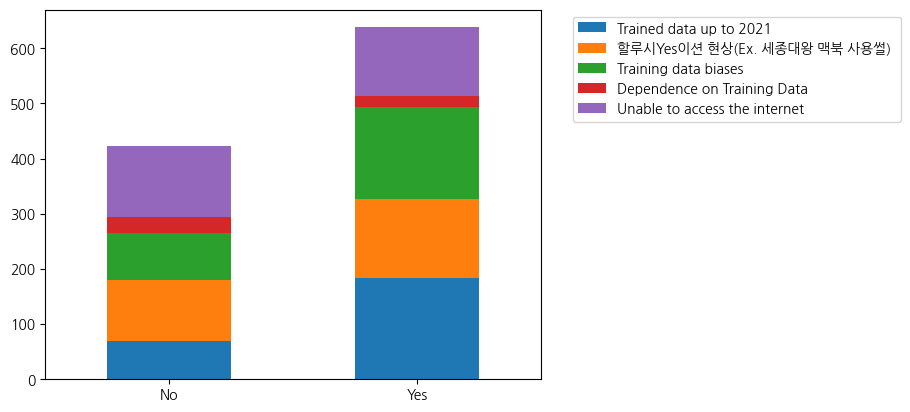

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import re

selected_columns = df.columns[df.columns.str.contains('ChatGPT의 문제점을 모두')]

# 각 열에 대한 빈도수를 데이터프레임으로 변환
df_counts = pd.DataFrame({col: df[col].value_counts() for col in selected_columns})

# 누적 막대 그래프 그리기
ax = df_counts.plot(kind='bar', stacked=True, rot=0)

# 범례 레이블 수정 - 대괄호 안의 값만 추출
labels = [re.search(r'\[(.*)\]', col).group(1) if re.search(r'\[(.*)\]', col) else col for col in selected_columns]

# 그래프 바깥에 범례 위치시키기
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

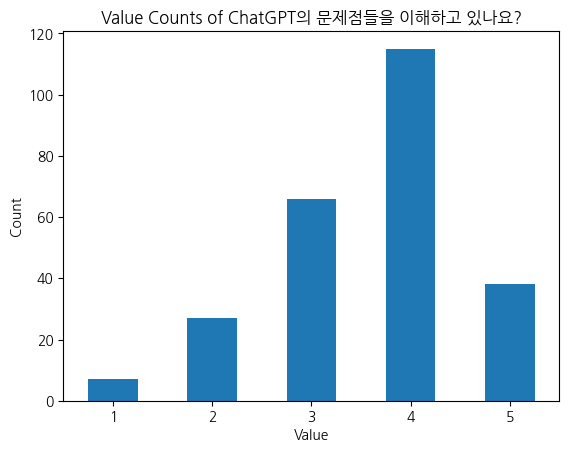

In [269]:
plot_value_counts(df,  'ChatGPT의 문제점들을 이해하고 있나요?')

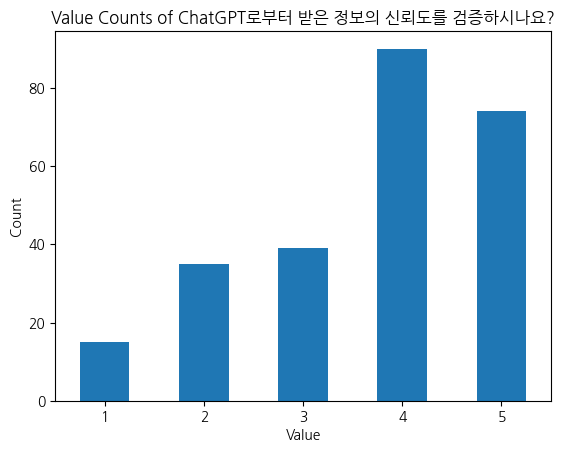

In [270]:
plot_value_counts(df,  'ChatGPT로부터 받은 정보의 신뢰도를 검증하시나요?')

<Axes: >

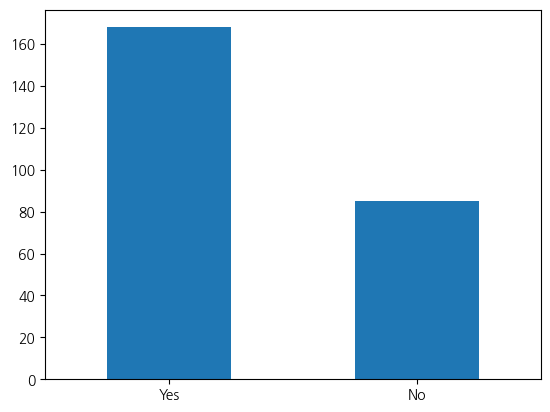

In [273]:
df['ChatGPT로부터 받은 정보를 다른 출처와 비교 검증하시나요?'].value_counts().plot.bar(rot=0)

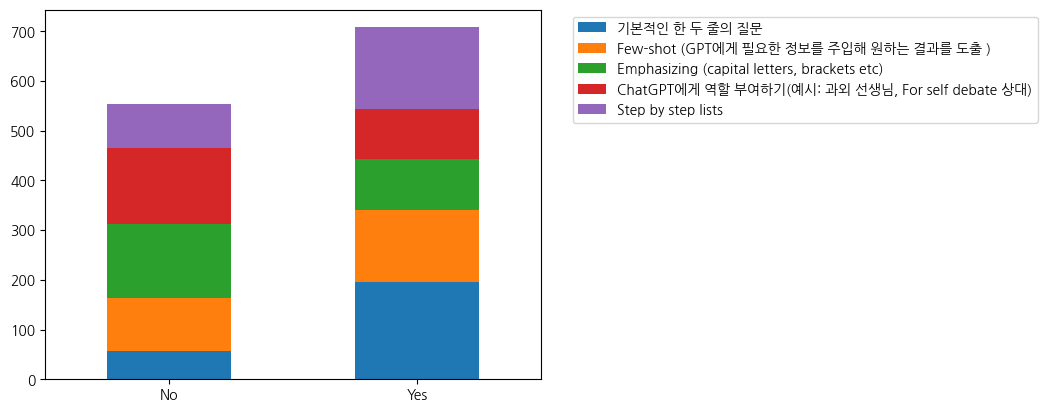

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import re

selected_columns = df.columns[df.columns.str.contains('어떻게 ChatGPT에 질문하시나요?')]

# 각 열에 대한 빈도수를 데이터프레임으로 변환
df_counts = pd.DataFrame({col: df[col].value_counts() for col in selected_columns})
df_counts = df_counts.iloc[:2,:]

# 누적 막대 그래프 그리기
ax = df_counts.plot(kind='bar', stacked=True, rot=0)

# 범례 레이블 수정 - 대괄호 안의 값만 추출
labels = [re.search(r'\[(.*)\]', col).group(1) if re.search(r'\[(.*)\]', col) else col for col in selected_columns]

# 그래프 바깥에 범례 위치시키기
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

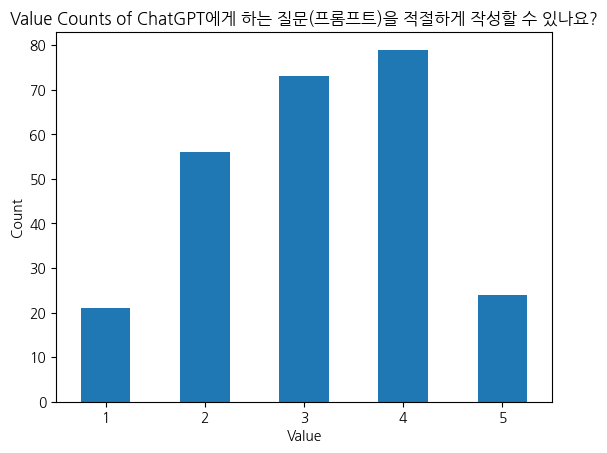

In [281]:
plot_value_counts(df,  'ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?')

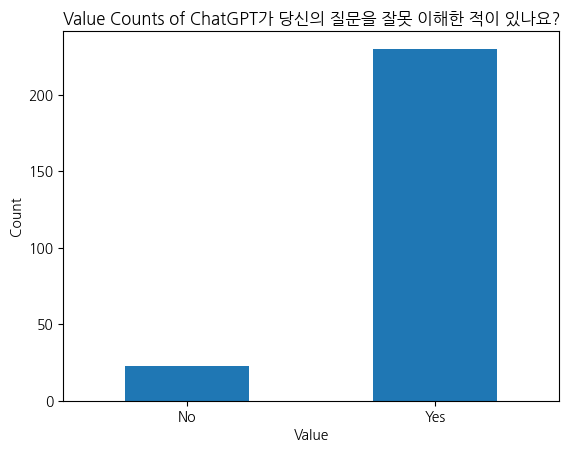

In [282]:
plot_value_counts(df,  'ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?')

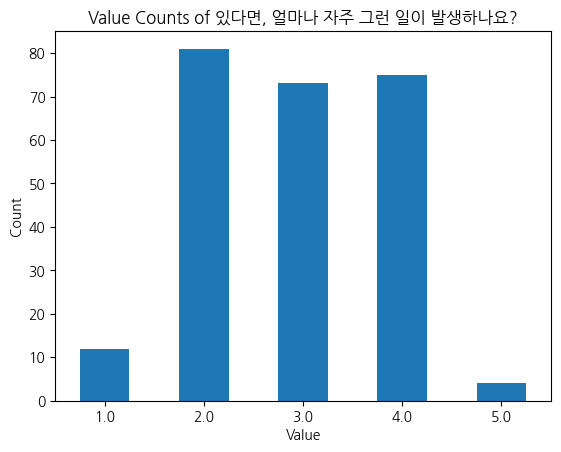

In [283]:
plot_value_counts(df,  '있다면, 얼마나 자주 그런 일이 발생하나요?')

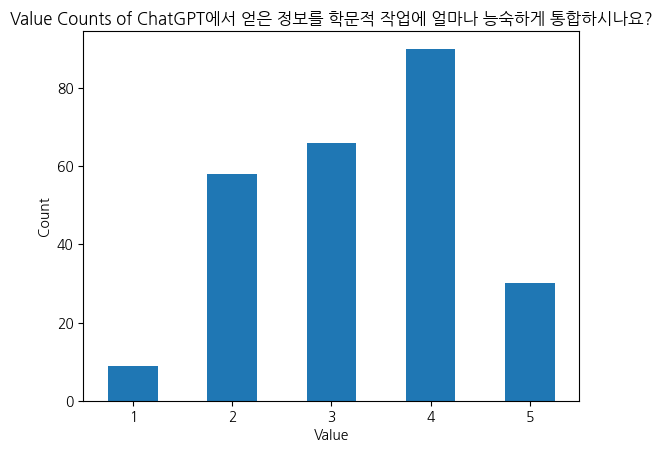

In [284]:
plot_value_counts(df,  'ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?') 

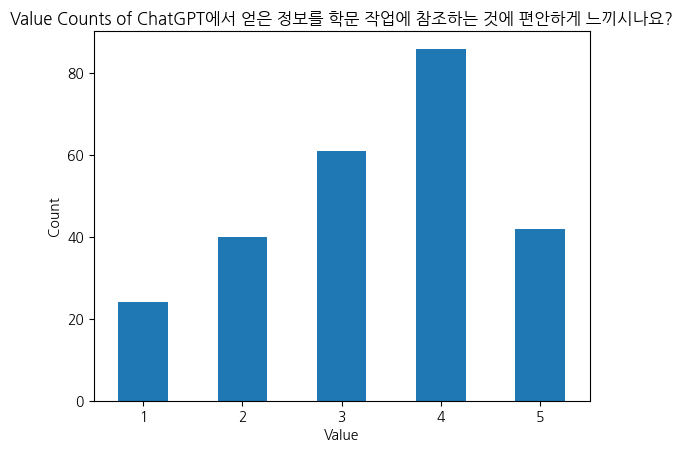

In [285]:
plot_value_counts(df,  'ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?') 

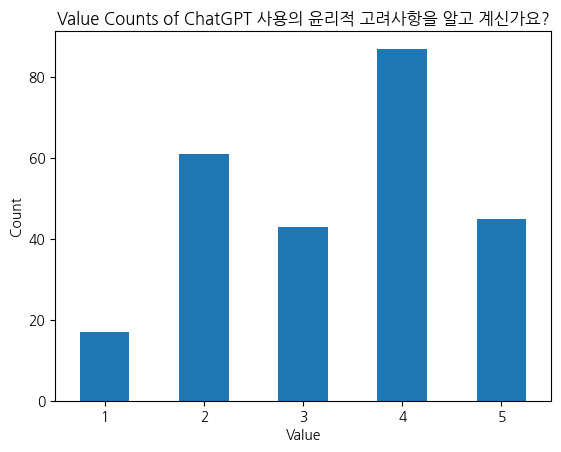

In [286]:
plot_value_counts(df,  'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?') 

In [288]:
words = []
for item in df['어떤 Ethical issue를 인지하고 계신가요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

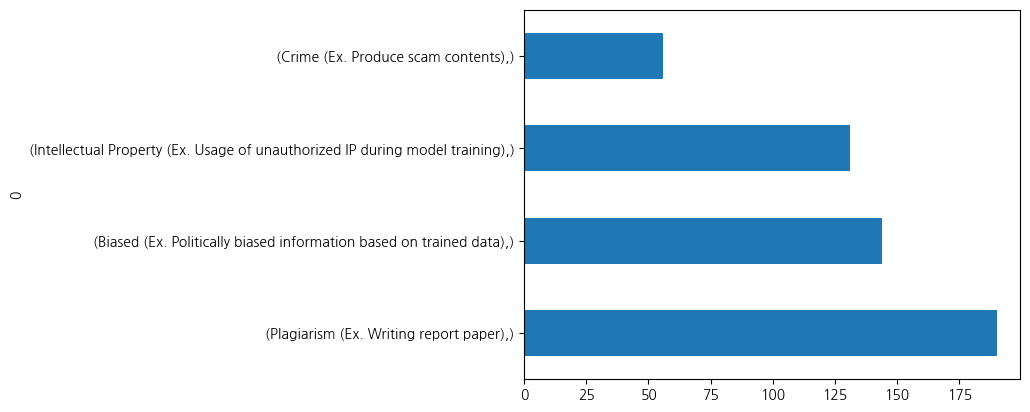

In [295]:
pd.DataFrame(words).value_counts()[:4].plot.barh()

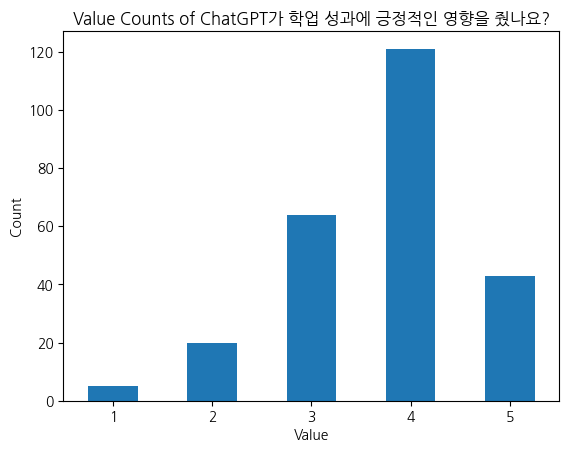

In [297]:
plot_value_counts(df,'ChatGPT가 학업 성과에 긍정적인 영향을 줬나요?')

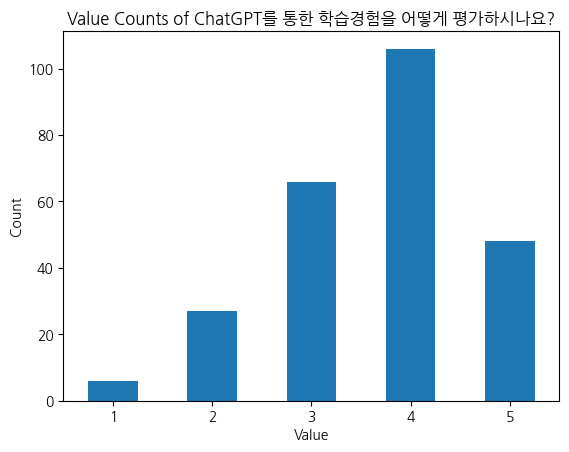

In [298]:
plot_value_counts(df,'ChatGPT를 통한 학습경험을 어떻게 평가하시나요?')

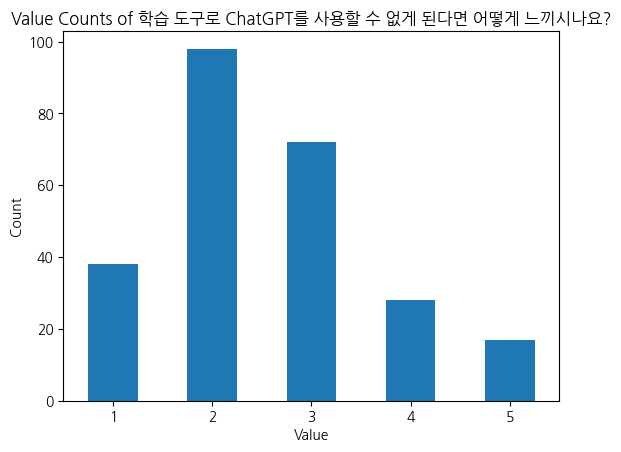

In [299]:
plot_value_counts(df, '학습 도구로 ChatGPT를 사용할 수 없게 된다면 어떻게 느끼시나요?')